In [ ]:
import pickle
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
import csv

with open('ejle_nonan_df.pkl', 'rb') as file:
    df = pickle.load(file)

file.close()

In [ ]:
abbr = {}
abbr['LOWINCPCT_MEAN'] = "% low income mean"
abbr['LOWINCPCT_MEDI'] = "% low income median"
abbr['LESSHSPCT_MEAN'] = "% less than high school education mean"
abbr['LESSHSPCT_MEDI'] = "% less than highschool education median"
abbr["REGION_MEAN"] = "US EPA region number mean"
abbr["REGION_MEDI"] = "US EPA region number median"
abbr["CANCER_MEAN"] = "Air toxics cancer risk mean"
abbr["CANCER_MEDI"] = "Air toxics cancer risk median"
abbr["VULEOPCT_MEDI"] = "Demographic index median"
abbr["UNEMPPCT_MEAN"] = "% unemployed mean"
abbr["P_RESP_MEDI"] = "Percentile for air toxics respiratory HI median"
abbr["P_CANCR_MEDI"] = "Percentile for air toxics cancer risk median"
abbr["D_LDPNT_2_MEDI"] = "EJ index for lead paint median"
abbr["D_LDPNT_2_MEAN"] = "EJ index for lead paint mean"
abbr["RESP_MEAN"] = "Air toxics respiratory HI mean"
abbr["RESP_MEDI"] = "Air toxics respiratory HI median"
abbr["D_CANCR_2_MEAN"] = "EJ index for air toxics cancer risk mean"
abbr["D_CANCR_2_MEDI"] = "EJ index for air toxics cancer risk median"
abbr["VULEOPCT_MEAN"] = "Demographic index mean"
abbr["P_VULEOPCT_MEAN"] = "Percentile for demographic index mean"
abbr["D_RESP_2_MEDI"] = "EJ index for air toxics respiratory HI median"

In [ ]:
def Filter(X, y, num_features, abbr):
    names = [col for col in X.columns]
    X_filtered = X[names]
    X_filtered = X
    
    mi = mutual_info_regression(X_filtered, y)
    mi = pd.Series(mi)
    mi.index = names
    top_mi = mi.sort_values(ascending=False)[:num_features]
    top_mi.plot.bar(figsize=(10, 4))
    
    
    
    # Map the abbreviations to their corresponding descriptions for the tick labels
    tick_labels = [abbr.get(col, col) for col in top_mi.index]
    wrapped_labels = [ '\n'.join(textwrap.wrap(label, 20)) for label in tick_labels ]
    plt.gca().set_xticklabels(wrapped_labels)
    plt.xticks(rotation=45)  # Update this line
    
    plt.xlabel('Features')
    plt.ylabel('Mutual Information')
    plt.title('Top 10 Features by Mutual Information')
    plt.show()
    
    return top_mi.sort_values(ascending=False)

In [ ]:
# importing dataset
with open('EJSLE_mnmdstdv_demoend.pkl', 'rb') as file:
    df = pickle.load(file)

file.close()

y_mean = df['LE_MEAN']
y_median = df['LE_MEDI']

# Selecting X variables by excluding unwanted columns
# exclusing STATE_NAME, ST_ABBREV, CITY_NAME, LE_MEAN, LE_MEDI
X = df.drop(['LE_MEAN', 'LE_MEDI'], axis=1)
X = X.drop(X.columns[:3], axis=1)

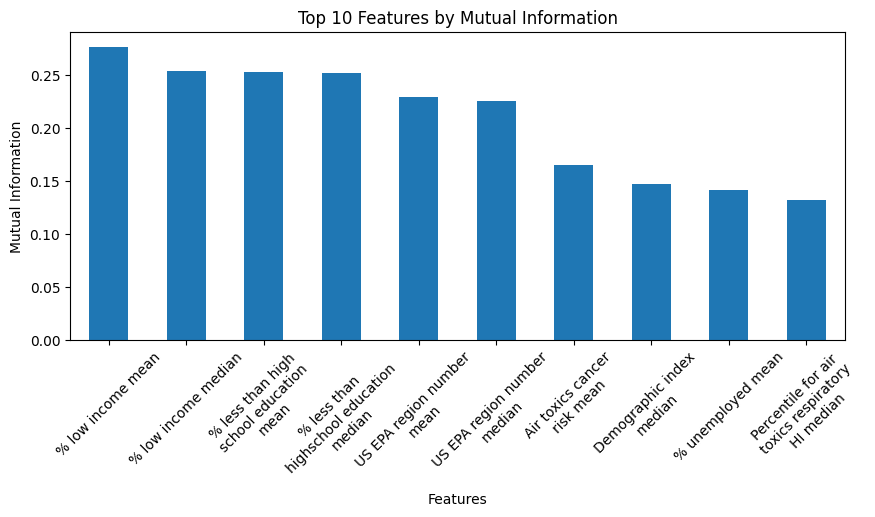

In [ ]:
num_features = 10
mean_features = Filter(X, y_mean, num_features, abbr)

In [ ]:
# importing dataset
with open('EJSLE_mnmdstdv_demoend.pkl', 'rb') as file:
    df = pickle.load(file)

file.close()

y_mean = df['LE_MEAN']
y_median = df['LE_MEDI']

# Selecting X variables by excluding unwanted columns
# exclusing STATE_NAME, ST_ABBREV, CITY_NAME, LE_MEAN, LE_MEDI
X = df.drop(['LE_MEAN', 'LE_MEDI'], axis=1)
X = X.drop(X.columns[:3], axis=1)

# excluding all demographic columns 
X= X.loc[:, :'P_PWDIS_D2_STDV']

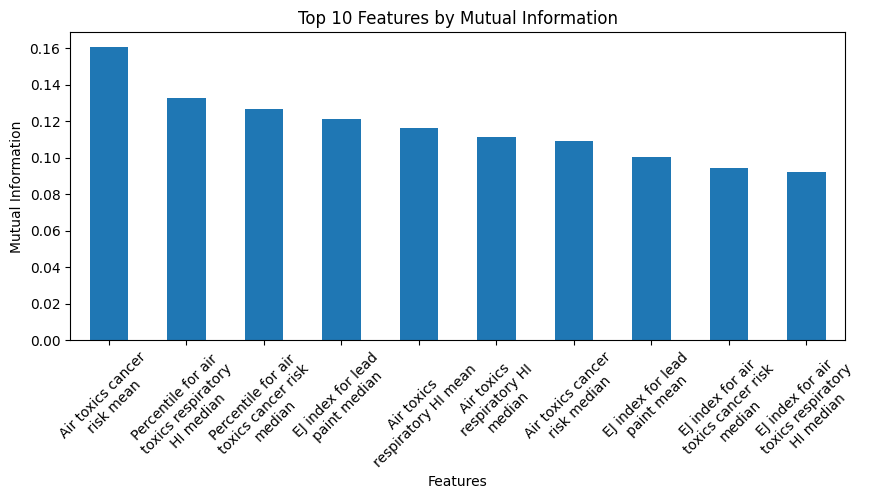

In [ ]:
num_features = 10
mean_features = Filter(X, y_mean, num_features, abbr)